<a href="https://colab.research.google.com/github/chelseaangeles/capstone-project/blob/main/%5BCLASSIFICATION_TASK%5D_EMTECH_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEECE 2 Capstone Project**
### *Lifestyle and Learning – Predicting Student Performance*


### **I. Introduction**



This project utilizes a simulated dataset of 1,000 student records sourced from Kaggle. Each record
captures key lifestyle habits—such as study hours, sleep patterns, screen time, diet, and mental health—
and relates them to academic performance, specifically the final exam score. The dataset is ideal for
educational machine learning applications, enabling learners to perform data preprocessing, visualization,
clustering, regression, and classification.
You are tasked with analyzing how these lifestyle factors affect student performance, and building predictive
models based on insights you derive.

Dataset: [student_habits_performance.csv](http://tupmla-my.sharepoint.com/:x:/g/personal/timothy_amado_tup_edu_ph/EfN9-KVzM0JMqo7dl7XNWO4BnY2EA5M44xa27TcDsnJCpA?rtime=Y4fP_uGW3Ug)

### **II. Project Goals**


*   Determine relationships between lifestyle habits and final exam scores
*   Discover meaningful student groupings based on lifestyle through clustering
*   Build and evaluate models that predict academic performance
*   Summarize and communicate findings through data storytelling

### **III. Project Components**

**1.   Problem Definition**

*   Formulate a clear research question.


> *How does mental health status influence the relationship between lifestyle habits and academic performance?*

We aim to:

*   Investigate interaction effects between mental health and lifestyle factors such as study hours per day, sleep hours, part-time job, exercise frequency, diet quality, and total screen time.
*   Determine whether mental health moderates the impact of these habits on performance.
*   Build predictive models and interpret feature importances.

**2.   Data Understanding and Preprocessing**

*   Load and inspect the dataset.
*   Handle:
    - Missing values
    - Categorical variables (apply label/one-hot encoding)
    - Scaling (for models like K-Means and regression)
*   Engineer new features if helpful (e.g., combine screen time metrics)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

sns.set(style="whitegrid")

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/My Drive/CAPSTONE-PROJECT/student_habits_performance.xlsx"
df = pd.read_excel(file_path)

pd.set_option('display.max_columns', None)
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# Drop ID column
df.drop(columns=["student_id", "age", "gender", "parental_education_level", "internet_quality",
                 "extracurricular_participation"], inplace=True)

# Map non-numeric data to numeric
df['diet_quality'] = df['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})
df['part_time_job'] = df['part_time_job'].map({'No': 0, 'Yes': 1})

# Impute missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [ ]:
# Combine social_media_hours and netflix_hours to create a new feature called total_screen_time
df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
#df_scaled['total_screen_time'] = scaler.fit_transform(df[['total_screen_time']])

display(df[['social_media_hours', 'netflix_hours', 'total_screen_time']].head())

,social_media_hours,netflix_hours,total_screen_time
0,1.2,1.1,2.3
1,2.8,2.3,5.1
2,3.1,1.3,4.4
3,3.9,1.0,4.9
4,4.4,0.5,4.9


In [ ]:
df.drop(columns=["social_media_hours", "netflix_hours"], inplace=True)

**3. Exploratory Data Analysis (EDA)**

*   Visualizations:
    - Histograms for feature distributions
    - Scatter plots and box plots for comparing habits vs. scores
    - Correlation heatmap


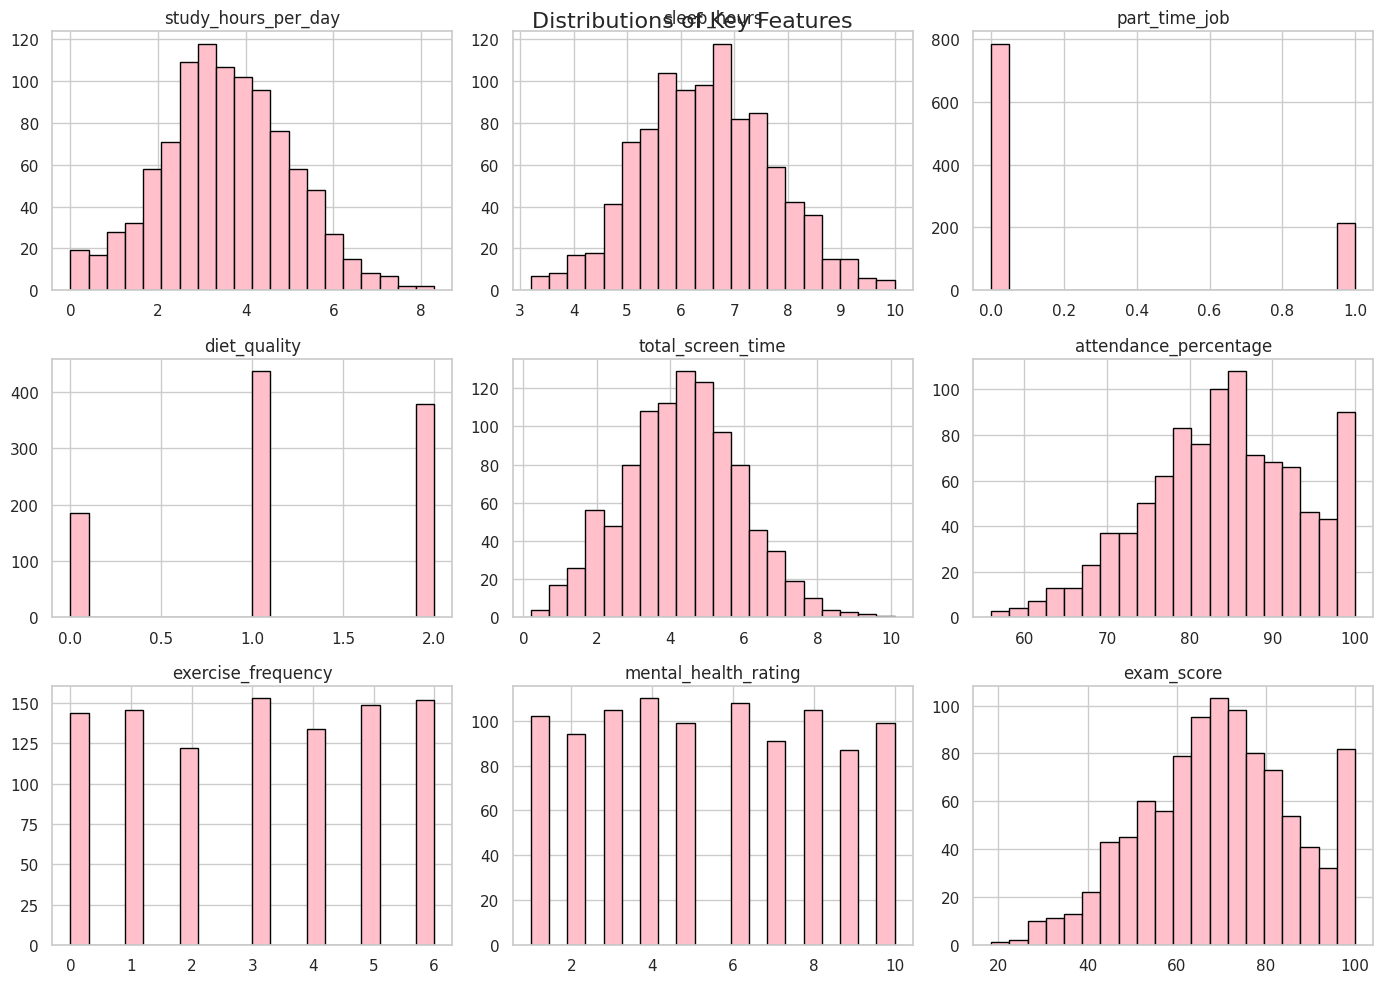

In [ ]:
# A. Histograms
df[['study_hours_per_day', 'sleep_hours', 'part_time_job', 'diet_quality', 'total_screen_time',  'attendance_percentage',
    'exercise_frequency', 'mental_health_rating', 'exam_score']].hist(bins=20, figsize=(14, 10), color='pink', edgecolor='black')
plt.tight_layout()
plt.suptitle("Distributions of Key Features", fontsize=16)
plt.show()

The objective of this project is to answer the research question "How does mental health status influence the relationship between lifestyle habits and academic performance?"

The data visualized above are selected the features to be used in this capstone project. The selected are the features considered to be a factor affecting exam scores, such as lifestyle habits (e.g. study_hours_per_day, sleep_hours, diet_quality,total_screen_time, attendance_percentage, and exercise_frequency). mental_health_rating is a factor that affects a student's lifestyle habits so it is also a factor needed to be considered.

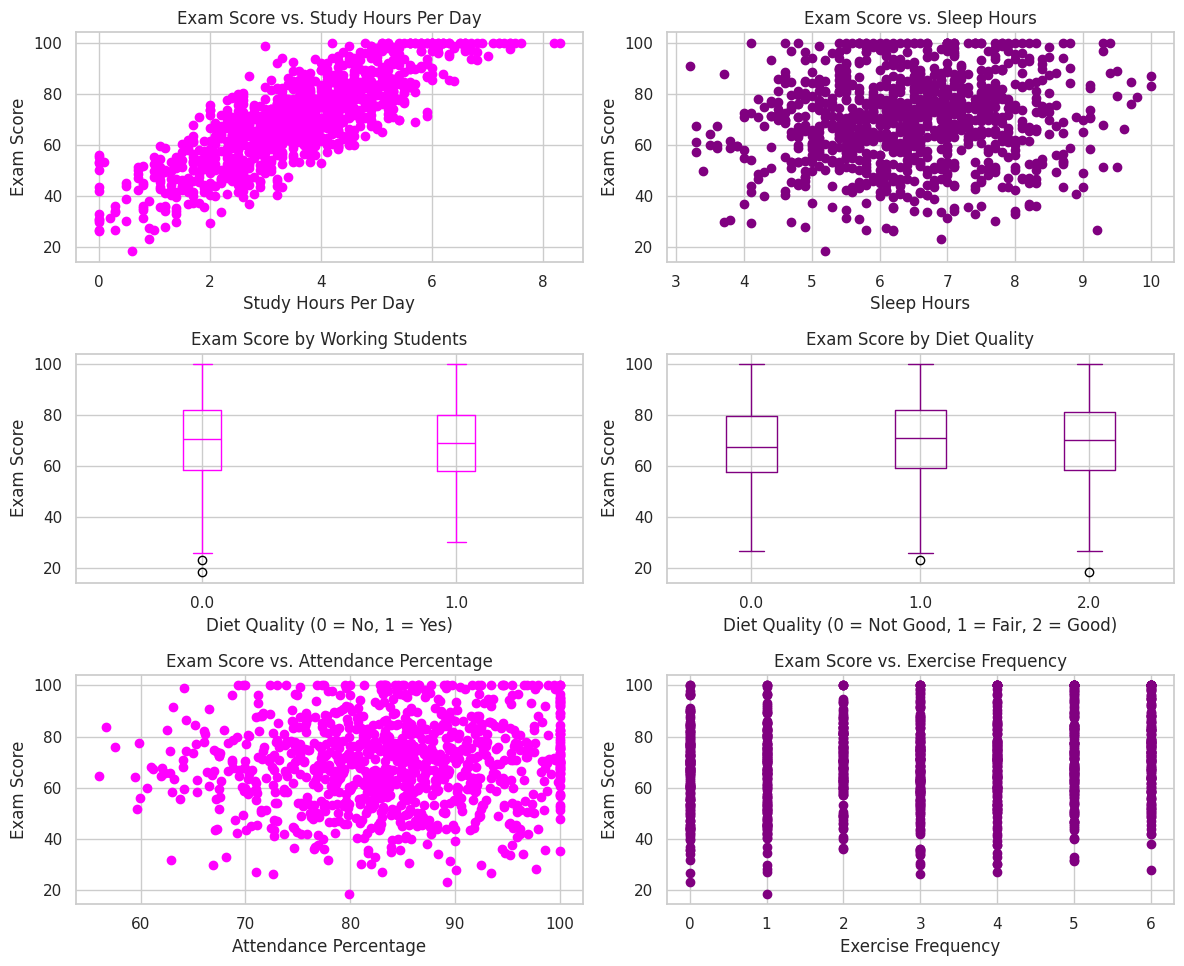

In [ ]:
#B. Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Scatter plot for study_hours_per_day vs. exam_score
axes[0, 0].scatter(df['study_hours_per_day'], df['exam_score'], color='magenta')
axes[0, 0].set_xlabel('Study Hours Per Day')
axes[0, 0].set_ylabel('Exam Score')
axes[0, 0].set_title('Exam Score vs. Study Hours Per Day')

# sleep_hours vs. exam_score:
axes[0, 1].scatter(df['sleep_hours'], df['exam_score'], color='purple')
axes[0, 1].set_xlabel('Sleep Hours')
axes[0, 1].set_ylabel('Exam Score')
axes[0, 1].set_title('Exam Score vs. Sleep Hours')

# Box plot for part_time_job vs. exam_score
df.boxplot(column='exam_score', by='part_time_job', ax=axes[1, 0], color='magenta')
axes[1, 0].set_xlabel('Diet Quality (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Exam Score')
axes[1, 0].set_title('Exam Score by Working Students')
fig.suptitle('') # Suppress the default title

# Box plot for diet_quality vs. exam_score
df.boxplot(column='exam_score', by='diet_quality', ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Diet Quality (0 = Not Good, 1 = Fair, 2 = Good)')
axes[1, 1].set_ylabel('Exam Score')
axes[1, 1].set_title('Exam Score by Diet Quality')
fig.suptitle('') # Suppress the default title

# attendance_percentage vs. exam_score:
axes[2, 0].scatter(df['attendance_percentage'], df['exam_score'], color='magenta')
axes[2, 0].set_xlabel('Attendance Percentage')
axes[2, 0].set_ylabel('Exam Score')
axes[2, 0].set_title('Exam Score vs. Attendance Percentage')

# exercise_frequency vs. exam_score:
axes[2, 1].scatter(df['exercise_frequency'], df['exam_score'], color='purple')
axes[2, 1].set_xlabel('Exercise Frequency')
axes[2, 1].set_ylabel('Exam Score')
axes[2, 1].set_title('Exam Score vs. Exercise Frequency')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

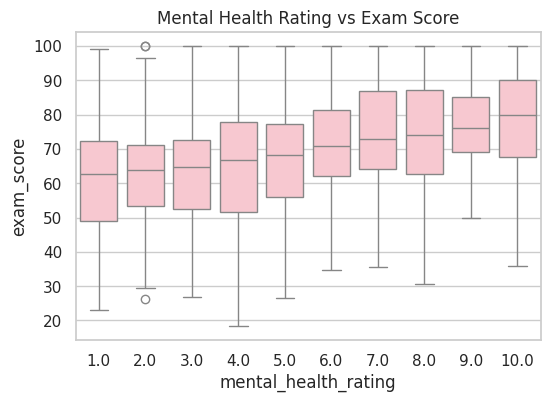

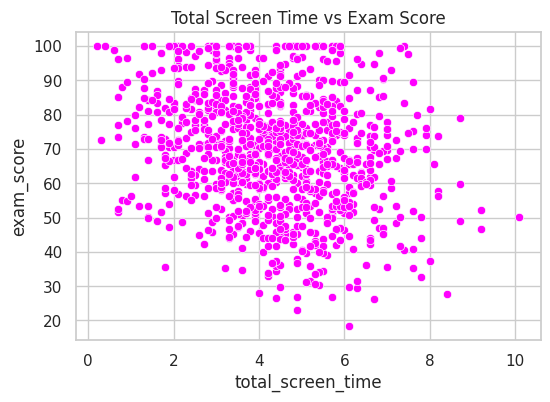

In [ ]:
#C. Box Plot: Mental Health vs Exam Score
plt.figure(figsize=(6, 4))
sns.boxplot(x='mental_health_rating', y='exam_score', color='pink', data=df)
plt.title("Mental Health Rating vs Exam Score")
plt.show()

#D. Scatter Plot: Total Screen Time vs Exam Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_screen_time', y='exam_score', color='magenta', data=df)
plt.title("Total Screen Time vs Exam Score")
plt.show()

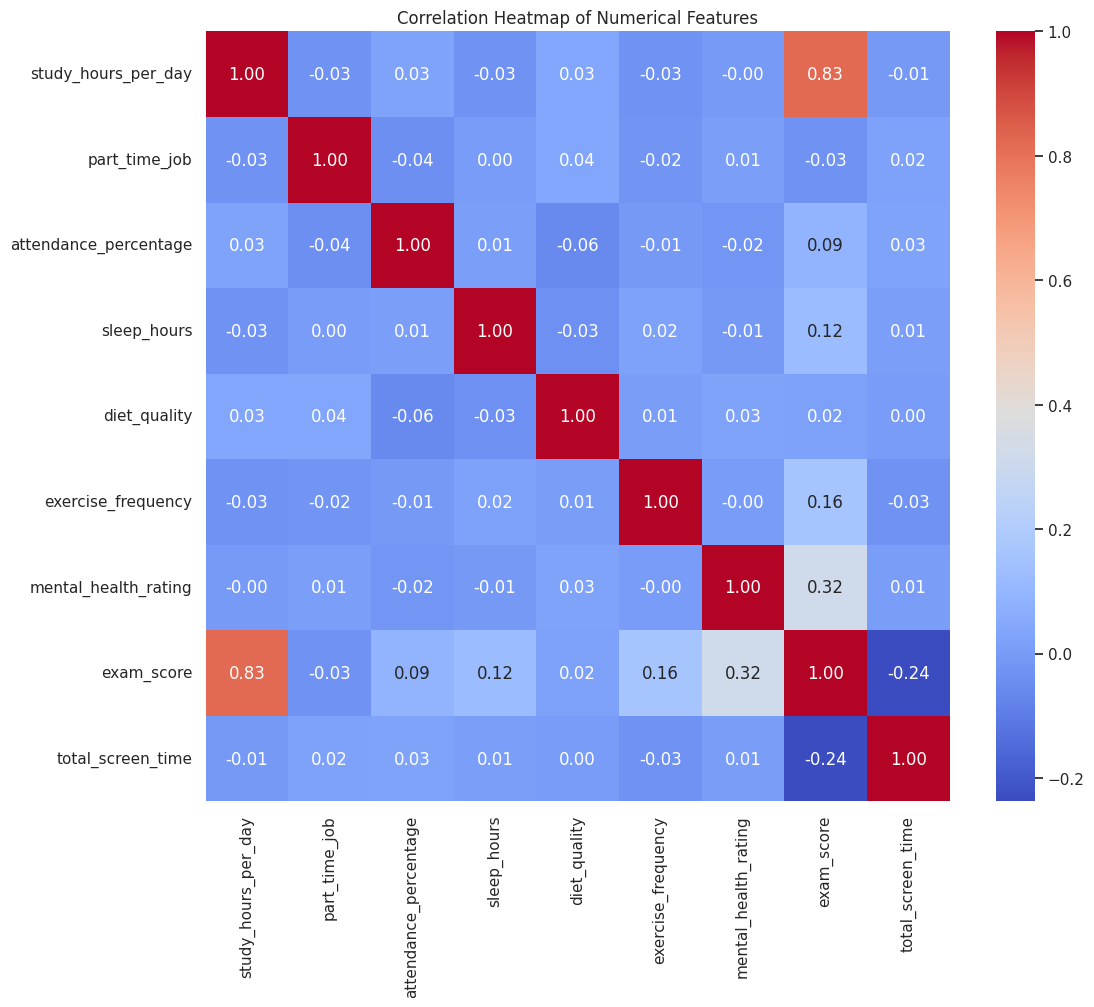

In [ ]:
# E. Correlation heatmap
# Re-evaluate numeric columns after dropping 'social_media_hours' and 'netflix_hours'
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**4. Clustering (Unsupervised Learning)**

Apply K-Means clustering using lifestyle features (excluding exam score)
Determine optimal K using:
Elbow method (inertia plot)
Silhouette score
Label and describe each cluster

In [ ]:
# Use lifestyle features only (excluding exam score)
features = df.drop('exam_score',axis=1).to_numpy()
labels = df['exam_score'].to_numpy()

#Scaling of features
scaler = StandardScaler()

X_cluster = features
features = scaler.fit_transform(X_cluster)

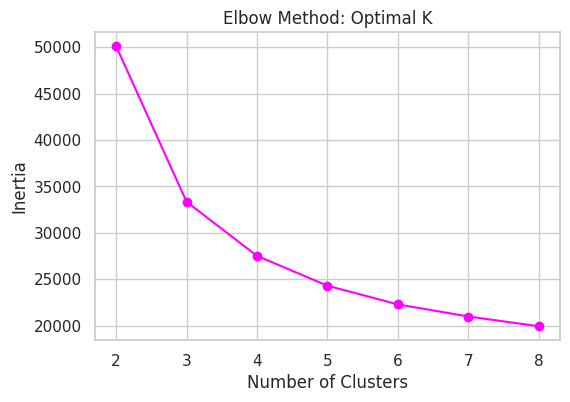

In [ ]:
# Elbow method
inertia = []
k_range = range(2, 9)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o', color='magenta')
plt.title("Elbow Method: Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

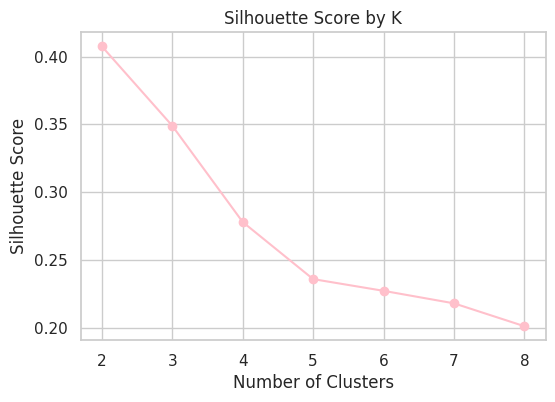

In [ ]:
# Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    silhouette_scores.append(silhouette_score(X_cluster, labels))

plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='pink')
plt.title("Silhouette Score by K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Apply optimal K (choose based on elbow/silhouette, e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

In [ ]:
cluster_summary = df.groupby('cluster')[['study_hours_per_day', 'sleep_hours', 'part_time_job',
                                         'diet_quality', 'total_screen_time',  'attendance_percentage',
                                         'exercise_frequency', 'mental_health_rating']].mean()
print("\n📊 Cluster Profiles:")
display(cluster_summary)


📊 Cluster Profiles:


,study_hours_per_day,sleep_hours,part_time_job,diet_quality,total_screen_time,attendance_percentage,exercise_frequency,mental_health_rating
cluster,,,,,,,,
0,3.514403,6.433333,0.205761,1.255144,4.320988,71.624280,3.065844,5.551440
1,3.600345,6.563103,0.175862,1.148276,4.408966,95.260690,2.965517,5.475862
2,3.537473,6.431478,0.244111,1.188437,4.275375,83.728908,3.077088,5.355460


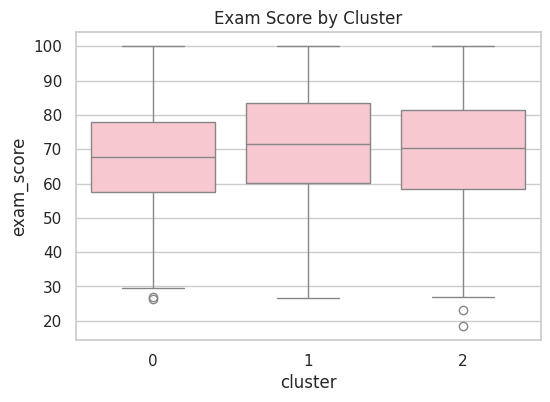

In [ ]:
# Optionally visualize clusters
plt.figure(figsize=(6, 4))
sns.boxplot(x='cluster', y='exam_score', color='pink', data=df)
plt.title("Exam Score by Cluster")
plt.show()


📊 Cluster Profiles:


,study_hours_per_day,sleep_hours,part_time_job,diet_quality,total_screen_time,attendance_percentage,exercise_frequency,mental_health_rating
cluster,,,,,,,,
0,3.464759,6.423193,0.213855,1.222892,4.164157,79.843675,3.012048,5.256024
1,3.667526,6.478351,0.159794,1.092784,4.442268,97.261856,3.005155,5.365979
2,3.562776,6.523028,0.239748,1.201893,4.409148,88.027445,3.041009,5.599369
3,3.559873,6.452229,0.235669,1.235669,4.351592,69.108917,3.152866,5.585987


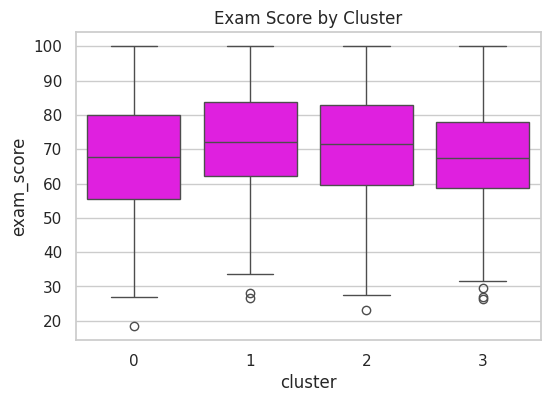

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

cluster_summary = df.groupby('cluster')[['study_hours_per_day', 'sleep_hours', 'part_time_job',
                                         'diet_quality', 'total_screen_time',  'attendance_percentage',
                                         'exercise_frequency', 'mental_health_rating']].mean()
print("\n📊 Cluster Profiles:")
display(cluster_summary)

# Optionally visualize clusters
plt.figure(figsize=(6, 4))
sns.boxplot(x='cluster', y='exam_score', color='magenta', data=df)
plt.title("Exam Score by Cluster")
plt.show()

**Classification Task**

**Convert Exam Scores into Performance Levels**

We categorize exam scores into three performance levels:

Low: bottom 33%

Average: middle 34%

High: top 33%

In [ ]:
# Define performance categories based on quantiles
performance_bins = [df['exam_score'].min(), df['exam_score'].quantile(0.33),
                    df['exam_score'].quantile(0.67), df['exam_score'].max()]
performance_labels = ['Low', 'Average', 'High']

# Creating a new categorical feature for performance
df['performance_level'] = pd.cut(df['exam_score'], bins=performance_bins, labels=performance_labels, include_lowest=True)

df['performance_level'].value_counts()

,count
performance_level,
Average,338
Low,332
High,330


**Visualizing Performance Levels**

Let's visualize the distribution of performance levels:

<ipython-input-22-4a1893cf1356>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_level', data=df, palette='coolwarm')


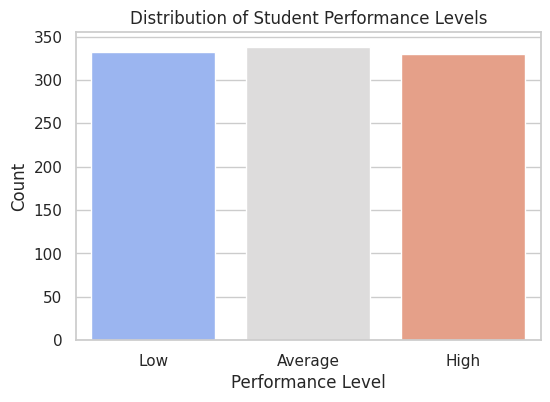

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='performance_level', data=df, palette='coolwarm')
plt.title('Distribution of Student Performance Levels')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()

**Classification Models**

We'll build and evaluate two popular classification models:


*   Logistic Regression
*   Decision Tree Classifier

**Data Preparation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Selecting features and target variable
X_classification = df.drop(columns=['exam_score', 'performance_level', 'cluster'])
y_classification = df['performance_level']

# Scaling the features
scaler = StandardScaler()
X_class_scaled = scaler.fit_transform(X_classification)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_class_scaled, y_classification, test_size=0.2, random_state=42, stratify=y_classification)


**1. Logistic Regression**

Logistic Regression Performance:
Accuracy: 0.79
Weighted F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

     Average       0.68      0.71      0.69        68
        High       0.86      0.77      0.82        66
         Low       0.83      0.88      0.85        66

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



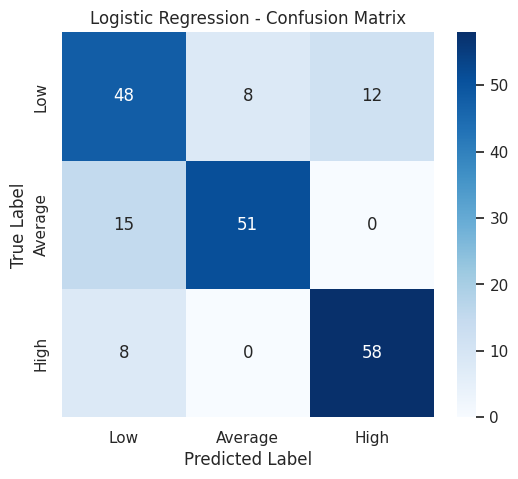

In [ ]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)

# Predicting on test set
y_pred_lr = log_reg.predict(X_test)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Weighted F1-Score: {f1_lr:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=performance_labels, yticklabels=performance_labels)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**2. Decision Tree Classifier**

Decision Tree Classifier Performance:
Accuracy: 0.70
Weighted F1-Score: 0.70

Classification Report:
              precision    recall  f1-score   support

     Average       0.57      0.57      0.57        68
        High       0.74      0.74      0.74        66
         Low       0.79      0.79      0.79        66

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



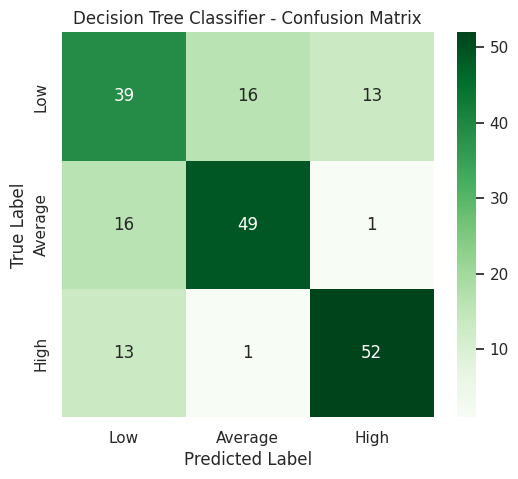

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_clf.fit(X_train, y_train)

# Predicting on test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Weighted F1-Score: {f1_dt:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens',
            xticklabels=performance_labels, yticklabels=performance_labels)
plt.title("Decision Tree Classifier - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Comparing Model Performance**

To summarize, let's compare the accuracy and weighted F1-score for both models clearly.

📊 Model Performance Comparison:


,Model,Accuracy,Weighted F1-Score
0,Logistic Regression,0.785,0.785571
1,Decision Tree,0.700,0.700000


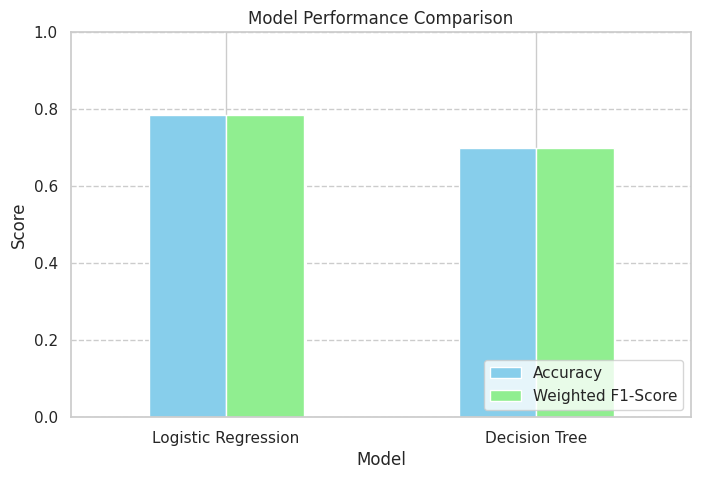

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_dt],
    'Weighted F1-Score': [f1_lr, f1_dt]
})

print("📊 Model Performance Comparison:")
display(comparison_df)

# Bar plot visualization for easy comparison
comparison_df.set_index('Model').plot(kind='bar', figsize=(8,5), color=['skyblue', 'lightgreen'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--')
plt.show()


#**IV. Interpretation and Insights**

##**A. Feature Importance**

**1. Tree-based Models (Decision Tree and Random Forest Regressors)**

Based on the Decision Tree and Random Forest regressors we trained earlier, the most significant lifestyle features affecting student performance were identified through the calculated feature importance scores. The analysis consistently highlights that:


*   **Study Hours per Day** emerged as the most influential predictor, positively associated with higher exam scores.
*   **Mental Health Rating** was another critical predictor, indicating that better mental health conditions strongly support improved academic performance.
*   **Attendance Percentage** also appeared significant, reinforcing the importance of regular class attendance in achieving higher scores.
*   **Sleep Hours** showed a notable impact, underscoring adequate rest as essential for optimal academic outcomes.
*   **Total Screen Time** negatively correlated with academic performance, indicating that excessive screen usage detracts from academic success.

**2. Linear Regression Model**

The coefficients derived from our Linear Regression model revealed similar insights. Positive coefficients confirmed that increases in Study Hours per Day, Attendance Percentage, and Mental Health Rating are directly associated with higher exam scores. Conversely, negative coefficients for features like Total Screen Time emphasized their detrimental effect on academic performance.

**3. Classification Task (Decision Tree Classifier and Logistic Regression)**

The classification task further validated these findings. The trained Decision Tree Classifier indicated that Study Hours per Day, Mental Health Rating, and Attendance Percentage were primary factors distinguishing students in the "High," "Average," and "Low" performance categories. Similarly, Logistic Regression coefficients reinforced these findings, consistently identifying these features as major determinants of academic success.

##**Summary of Key Influential Features:**

The cumulative analysis of regression and classification models consistently pinpointed the following as the most impactful lifestyle features:
*   **Study Hours per Day**
*   **Mental Health Rating**
*   **Attendance Percentage**
*   **Sleep Hours**
*   **Total Screen Time**